# timeline_plot

In [1]:
import pandas as pd
import numpy as np
from math import sqrt

In [2]:
df = pd.DataFrame(
    {
    'n': [57666,76088,67674,17982,12873],
    'percent_damaged': [19.2,21.5,22.9,19.9,21.3],
    'start_date': ['2020-09-30','2020-12-11','2021-03-03','2021-05-07','2021-08-23'],
    'end_date': ['2020-10-22','2020-12-24','2021-03-18','2021-05-20','2021-09-03']
    })   

In [3]:
# midpoint of two date columns
 
# make time data into Timestamp format
def try_totime(t):
    try:
        return pd.Timestamp(t)
    except:
        return np.nan
     
df['start'] = df.start_date.map(try_totime)
df['end'] = df.end_date.map(try_totime)
 
# generate midpoint time
# harder than it would seem...
df['time'] = df.start + (df.end - df.start)/2
df

,n,percent_damaged,start_date,end_date,start,end,time
0,57666,19.2,2020-09-30,2020-10-22,2020-09-30,2020-10-22,2020-10-11 00:00:00
1,76088,21.5,2020-12-11,2020-12-24,2020-12-11,2020-12-24,2020-12-17 12:00:00
2,67674,22.9,2021-03-03,2021-03-18,2021-03-03,2021-03-18,2021-03-10 12:00:00
3,17982,19.9,2021-05-07,2021-05-20,2021-05-07,2021-05-20,2021-05-13 12:00:00
4,12873,21.3,2021-08-23,2021-09-03,2021-08-23,2021-09-03,2021-08-28 12:00:00


In [4]:
def sem(percent, n):
    prop = percent/100
    ci = 1.96*sqrt(prop*(1-prop)/n)
    return 100*ci

#sem(19.2, 57666)

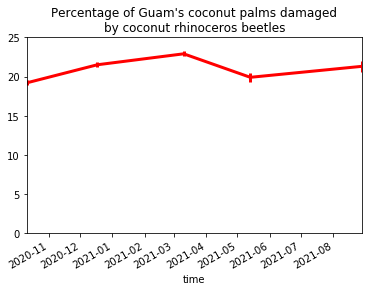

In [5]:
df['y_error'] = df.apply(lambda row: sem(row['percent_damaged'], row['n']), axis=1)
p = df.plot(x='time',
        #xlabel='survey date',
        #ylabel='% of palms damaged',
        y='percent_damaged',
        yerr='y_error',
        kind='line', 
        title="Percentage of Guam's coconut palms damaged\nby coconut rhinoceros beetles",
        legend=False,
        color='red', 
        #yticks = [19,20, 21, 22, 23],
        ylim=(0,25), 
        lw=3
       )
p;